# Clustering and PCA

In this assignment, you will be exploring difference between clique and kmeans algorithms for clustering and will get better understanding of PCA & Kmeans algorithms by manually implementing both of them.

--------------------

In [113]:
from sklearn.datasets import make_moons, make_blobs
import numpy as np
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.cluster import KMeans

In [114]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [115]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)


In [155]:
X, y = make_moons(n_samples=250, noise=0.05, random_state=42)

# Question 1
Scatter plot the dataset

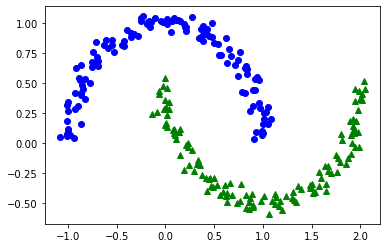

In [117]:
plt.plot(*X[y==0].T, 'bo')  # blue circles
plt.plot(*X[y==1].T, 'g^')  # green triangles
# plt.axis('equal')
# plt.grid('on')

# Question 2
In your opinion, how well will K-Means perform on the above dataset? Explain.

**Answer:**  
k-means algorithm will perform poorly on this dataset because it isn't scattered in a spherical fashion.  
another algorithm may work better.

# Question 3
1. Use Elbow method to find best "k". (Use inertia as metric).
2. Plot the elbow graph.
3. Train KMeans model using "k = 2".
4. Comment on the results.

In [118]:
# NEED TO CALCULATE INERTIA AND APPEND TO LIST
inertia = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

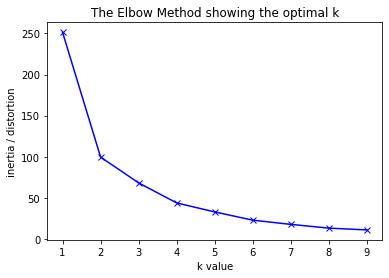

In [119]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k value')
plt.ylabel('inertia / distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

To determine the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion.  
<a>https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/</a>  
Therefore for this dataset, according to the kmeans elbow method, the optimal k is at k=4.

In [159]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X, y)
kmeans.inertia_
klabels = kmeans.labels_

In [152]:
train = kmeans.score(X,y)
print("train score = ", abs(train), " ----> accuracy = ", abs(round(train, 3)), " %")

train score =  99.48652012837256  ----> accuracy =  99.487  %


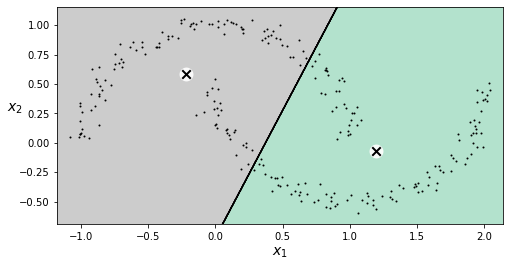

In [153]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

In [129]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X, y)
kmeans.inertia_

43.71340790897735

In [130]:
train = kmeans.score(X,y)
print("train score = ", abs(train), " ----> accuracy = ", abs(round(train, 3)), " %")

train score =  43.71340790897735  ----> accuracy =  43.713  %


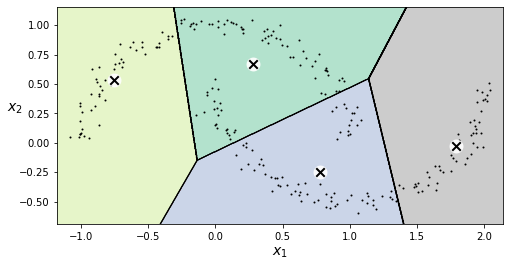

In [131]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X)
plt.show()

**@ k=2:** inertia is too high ----> too close to 100% ----> not optimal according to the elbow method.  
in comparison to **k=4** where the inertia doesn't go past 45% ----> more optimal according to the elbow method.

# Question 4
1. If you are going to use clique, what is a proper threshold value for the above dataset.
2. Find the best interval value that cluster the data into two clusters, plot the results.
3. Why do you think clique performed better on this dataset in comparison with KMeans?

**1.** threshold = 0 ----> considering all points as non-outliers

**2.** @ intervals = 8  ----> amount of clusters = 2  
       @ intervals = 9  ----> amount of clusters = 1  
       @ intervals = 10 ----> amount of clusters = 2  
**best interval** = 10 ----> separation between the 2 clusters is clear

Amount of clusters: 2


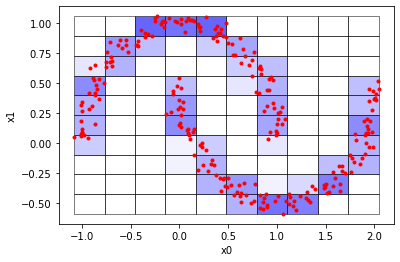

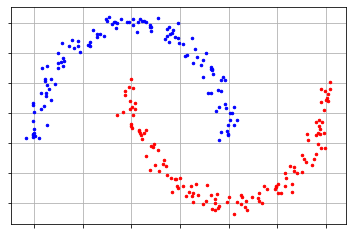

In [132]:
# create CLIQUE algorithm for processing
intervals = 10  # defines amount of cells in grid in each dimension
threshold = 0   # lets consider each point as non-outlier
clique_instance = clique(X, intervals, threshold)

# start clustering process and obtain results
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))

# visualize clustering results
clique_visualizer.show_grid(cells, X)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(X, clusters, noise)  # show clustering results

**3.** clique ----> grid based clustering algorithm ----> finds subspaces with high-density clusters.  
kmeans ----> clustering based on minimizing inertia criterion ----> inertia makes the assumption that clusters are convex and isotropic ----> performes poorly to elongated clusters, or manifolds with irregular shapes.

# Question 5
For the following dataset
1. Run kmeans algorithm clustering using k=2.
2. Run clique algorithm using interval = 15 and threshold = 6.
3. Plot results of both algorithms.
4. Comment on the following
    * What is the number of clusters in case of clique? and why?
    * Why do kmeans fail to cluster such data?

In [179]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state, centers=2)
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

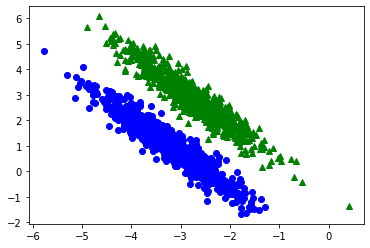

In [180]:
plt.plot(*X_aniso[y==0].T, 'bo')  # blue circles
plt.plot(*X_aniso[y==1].T, 'g^')  # green triangles

**1.**

In [181]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_aniso, y)
klabels = kmeans.labels_
klabels

array([1, 0, 0, ..., 1, 0, 1])

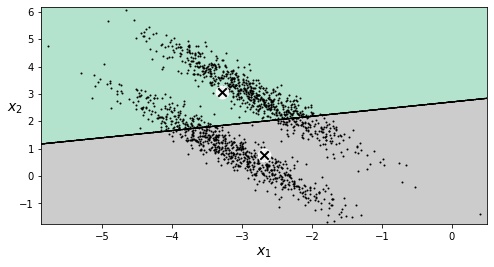

In [183]:
plt.figure(figsize=(8, 4))
plot_decision_boundaries(kmeans, X_aniso)
plt.show()

**2.**

In [182]:
# create CLIQUE algorithm for processing
intervals = 15  # defines amount of cells in grid in each dimension
threshold = 6
clique_instance = clique(X_aniso, intervals, threshold)

# start clustering process and obtain results
clique_instance.process()
clusters = clique_instance.get_clusters()  # allocated clusters
noise = clique_instance.get_noise()     # points that are considered as outliers (in this example should be empty)
cells = clique_instance.get_cells()     # CLIQUE blocks that forms grid
print("Amount of clusters:", len(clusters))

Amount of clusters: 4


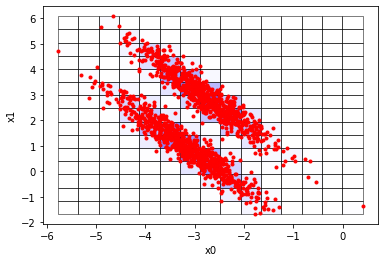

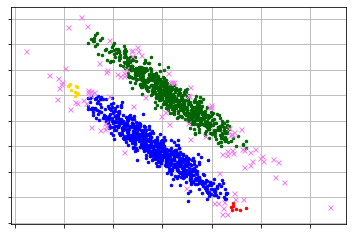

In [184]:
# visualize clustering results
clique_visualizer.show_grid(cells, X_aniso)    # show grid that has been formed by the algorithm
clique_visualizer.show_clusters(X_aniso, clusters, noise)  # show clustering results

**4.**

**CLIQUE:**    number of clusters = 4 ----> grid/interval number is too high therfore leading to the consideration of some points to be outliers thus leading to an increades number of clusters.  
**KMEANS:**    X data is transformed to be anisotropic ----> kmeans performance fails with anisotropic datasets.

# Question 6

Write your own PCA function that will return:
* The sorted eigenvectors of principal components
* The corresponding eigenvalues
* The transformed data

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [4]:
# STEPS FOR PCA
# 1- CENTER THE DATA BY CALCULATING THE MEAN AND SUBTRACTING IT FROM DATA POINTS
# 2- CALCULATE COVARIANCE MATRIX
# 3- CALCULATE EIGENVALUES AND EIGENVECTORS, SORT IF NEEDED
# 4- SELECT DESIRED EIGENVALUES/EIGENVECTORS
# 5- OBTAIN TRANSFORMATION MATRIX

In [2]:
# VARIANCE ----> variation of a single random variable
# COVARIANCE ---->variation of two or more random variables

In [6]:
from sklearn.preprocessing import StandardScaler
import numpy as np

def PCAfunction(X, y, nVar):
    
    # 1- CENTERING OF DATA
    X_centered = X - np.mean(X , axis = 0)
    
    # 2- COVARIANCE MATRIX
    features = X_centered.T
    covariance = np.cov(features)
    
    # 3- EIGENDECOMPOSITION
    values, vectors = np.linalg.eig(covariance)
    # sorting index based on eigenvectors
    sorted_index = np.argsort(vectors)[::-1]
    # sorting eigenvectors in descending order
    sorted_vectors = vectors[sorted_index]
    # sorting eigenvalues corresponding to eigenvectors
    sorted_values = values[sorted_index]
    
    # 4- EIGENREDUCTION // CHOOSING SUBSET BASED ON NUMBER OF VARIABLES
    subset = sorted_vectors[:, 0:nVar]
    
    # 5- DATA TRANSFORMATION
    X_trans = np.dot(subset.T, features).T
    
    return sorted_vectors, sorted_values, X_trans

# Question 7
Write your own K-means clustering, where the Euclidian distance is used to evaluate
the distance/ similarity between the dataset. The input to this function should be:
* The number of clusters
* The dataset

The output should be:
* The list of cluster centers

In [5]:
# STEPS FOR KMEANS
# 1- RANDOM K-CENTROIDS
# 2- EUCLIDEAN DISTANCES BETWEEN DATA POINTS AND CENTROIDS
# 3- CHOOSE CLOSEST CENTROID TO EACH DATA POINT
# 4- AVERAGING POINTS IN CLUSTER GROUP TO RECALCULATE CENTROID
# 5- STOP WHEN THE CENTROIDS ARE //SOMEWHAT// CONSTANT

In [11]:
import numpy as np
from scipy.spatial.distance import cdist

def KMeans(X, k, itr):
    
    # 1- RANDOM K-CENTROIDS
    random_samples = np.random.choice(len(X), k, replace=False)
    random_centroids = X[random_samples, :]
    
    # 2- EUCLIDEAN DISTANCES
    init_distances = cdist(X, random_centroids,'euclidean')
    
    # 3- MIN DISTANCE CENTROID
    new_centroids = np.array([np.argmin(i) for i in distances])

    # 4- RECALCULATING CENTROIDS
    for i in range(itr):
        centroids = []
        for ex in range(k):
            centroid_mean = X[new_centroids==ex].mean(axis=0)
            centroids.append(centroid_mean)
        centroids = np.vstack(centroids)
        # updating distances
        init_distances = cdist(X, centroids ,'euclidean')
        new_centroids = np.array([np.argmin(i) for i in init_distances])
        
    return new_centroids